<a href="https://colab.research.google.com/github/bhaktichowkwale/DataMiningProject/blob/master/DM_Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aim

We look forward to answering the following questions using the NYC Parking Ticket data.

EDA: 
1. States of License plate 
2. Timing of tickets 
3. Month wise tickets 
4. Car brand wise
5. Colorwise 
6. Location wise 
7. Violation code wise 
8. Which precinct has issued more tickets

#Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
!unzip "/content/gdrive/My Drive/Parking_Tickets_2013.zip"

Archive:  /content/gdrive/My Drive/Parking_Tickets_2013.zip
  inflating: Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv  


In [8]:
!pip install plotly --upgrade

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.12.0)


#Data

In [9]:
data = pd.read_csv("Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv")
data

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (17,18,20,21,22,23,29,30,31,32,36,38,39) have mixed types.Specify dtype option on import or set low_memory=False.



,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,13610,21190,20140831,33.0,33,33,921043,0033,0,0752A,NaN,NaN,F,712,W 175 ST,NaN,0.0,408.0,F1,NaN,BBBBBBB,ALL,ALL,GY,0.0,2013.0,-,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,40404,40404,20140430,33.0,33,33,921043,0033,0,1240P,NaN,NY,O,201,W 177 ST,NaN,0.0,408.0,C,NaN,BBBBBBB,ALL,ALL,WH,0.0,2012.0,-,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,31190,13610,20140228,33.0,33,33,921043,0033,0,1243P,NaN,NY,O,520,W 163 ST,NaN,0.0,408.0,F7,NaN,BBBBBBB,ALL,ALL,NaN,0.0,0.0,-,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,11710,12010,20141031,33.0,33,33,921043,0033,0,0232P,NaN,NY,O,517,W 176 ST,NaN,0.0,408.0,F1,NaN,BBBBBBB,ALL,ALL,WH,0.0,2010.0,-,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,12010,31190,0,33.0,33,33,921043,0033,0,1239P,NaN,NY,F,590,W 174 ST,NaN,0.0,408.0,E1,NaN,BBBBBBB,ALL,ALL,BR,0.0,2012.0,-,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9100273,8006150199,16088MC,NY,COM,06/25/2014,38,VAN,CHEVR,T,67530,26230,84730,88888888,70.0,70,70,350442,T302,K,0346P,NaN,K,F,522,Ocean Ave,NaN,0.0,408.0,h1,NaN,Y,0900A,0700P,WHITE,NaN,2011.0,NaN,0.0,10 3,38-Failure to Display Muni Rec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9100274,8006150217,94008JW,NY,COM,06/25/2014,38,VAN,CHEVR,T,26230,35680,67530,88888888,70.0,70,70,350442,T302,K,0414P,NaN,K,F,1913,Church Ave,NaN,0.0,408.0,h1,NaN,Y,0800A,0700P,WHITE,NaN,2007.0,NaN,0.0,10 3,38-Failure to Display Muni Rec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9100275,8006150242,FWG3729,NY,PAS,06/25/2014,70,SUBN,FORD,T,40930,40430,48230,20140531,70.0,70,70,350442,T302,K,0448P,NaN,K,F,654,Flatbush Ave,NaN,0.0,408.0,j3,NaN,YYYYYYY,NaN,NaN,WH,NaN,1996.0,NaN,0.0,10 3,70A-Reg. Sticker Expired (NYS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9100276,8006150254,193YUR,CT,PAS,06/25/2014,37,SUBN,CHEVR,T,40930,60830,74230,20140088,70.0,70,70,350442,T302,K,0454P,0229P,K,F,606,Flatbush Ave,NaN,0.0,408.0,h1,NaN,Y,0800A,0700P,BLACK,NaN,0.0,304-3007,0.0,10 3,37-Expired Muni Meter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
dataDF = pd.DataFrame(data)
dataDF

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,13610,21190,20140831,33.0,33,33,921043,0033,0,0752A,NaN,NaN,F,712,W 175 ST,NaN,0.0,408.0,F1,NaN,BBBBBBB,ALL,ALL,GY,0.0,2013.0,-,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,40404,40404,20140430,33.0,33,33,921043,0033,0,1240P,NaN,NY,O,201,W 177 ST,NaN,0.0,408.0,C,NaN,BBBBBBB,ALL,ALL,WH,0.0,2012.0,-,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,31190,13610,20140228,33.0,33,33,921043,0033,0,1243P,NaN,NY,O,520,W 163 ST,NaN,0.0,408.0,F7,NaN,BBBBBBB,ALL,ALL,NaN,0.0,0.0,-,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,11710,12010,20141031,33.0,33,33,921043,0033,0,0232P,NaN,NY,O,517,W 176 ST,NaN,0.0,408.0,F1,NaN,BBBBBBB,ALL,ALL,WH,0.0,2010.0,-,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,12010,31190,0,33.0,33,33,921043,0033,0,1239P,NaN,NY,F,590,W 174 ST,NaN,0.0,408.0,E1,NaN,BBBBBBB,ALL,ALL,BR,0.0,2012.0,-,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9100273,8006150199,16088MC,NY,COM,06/25/2014,38,VAN,CHEVR,T,67530,26230,84730,88888888,70.0,70,70,350442,T302,K,0346P,NaN,K,F,522,Ocean Ave,NaN,0.0,408.0,h1,NaN,Y,0900A,0700P,WHITE,NaN,2011.0,NaN,0.0,10 3,38-Failure to Display Muni Rec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9100274,8006150217,94008JW,NY,COM,06/25/2014,38,VAN,CHEVR,T,26230,35680,67530,88888888,70.0,70,70,350442,T302,K,0414P,NaN,K,F,1913,Church Ave,NaN,0.0,408.0,h1,NaN,Y,0800A,0700P,WHITE,NaN,2007.0,NaN,0.0,10 3,38-Failure to Display Muni Rec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9100275,8006150242,FWG3729,NY,PAS,06/25/2014,70,SUBN,FORD,T,40930,40430,48230,20140531,70.0,70,70,350442,T302,K,0448P,NaN,K,F,654,Flatbush Ave,NaN,0.0,408.0,j3,NaN,YYYYYYY,NaN,NaN,WH,NaN,1996.0,NaN,0.0,10 3,70A-Reg. Sticker Expired (NYS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9100276,8006150254,193YUR,CT,PAS,06/25/2014,37,SUBN,CHEVR,T,40930,60830,74230,20140088,70.0,70,70,350442,T302,K,0454P,0229P,K,F,606,Flatbush Ave,NaN,0.0,408.0,h1,NaN,Y,0800A,0700P,BLACK,NaN,0.0,304-3007,0.0,10 3,37-Expired Muni Meter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#EDA

##State wise registration

In [11]:
stateCount = dataDF['Registration State'].value_counts()[:10]
stateCount

NY    7029804
NJ     878677
PA     225760
CT     136973
FL     111887
MA      78650
VA      60951
MD      50407
IN      49126
NC      47117
Name: Registration State, dtype: int64

Text(0, 0.5, 'Count')

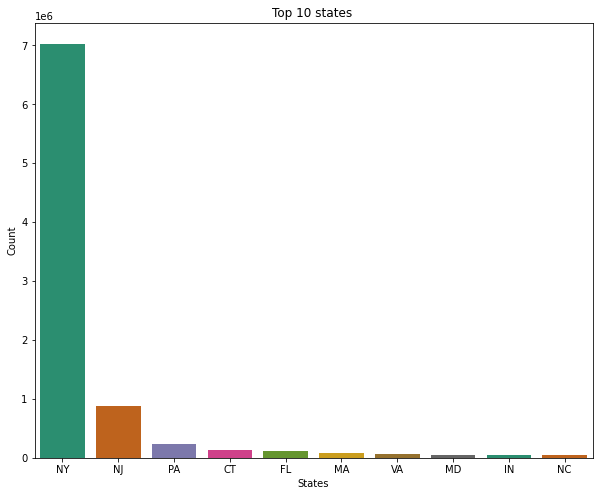

In [12]:
plt.figure(figsize=(10,8))
sns.barplot(x = stateCount.index, y = stateCount.values, palette="Dark2")
plt.title('Top 10 states ')
plt.xlabel('States')
plt.ylabel('Count')

##Timing of Tickets

In [13]:
violationTime = dataDF['Violation Time'].value_counts()[:30]
violationTime

0836A    27495
1136A    23682
0806A    23229
0936A    22780
1140A    22323
0906A    22291
0840A    22215
0940A    21360
0838A    20529
0837A    20365
1145A    20148
1139A    19917
1138A    19906
0839A    19850
1137A    19697
0945A    19564
0910A    19499
0845A    19379
1141A    19350
0938A    19342
1142A    19166
0937A    19023
0841A    19003
0939A    18866
1143A    18790
1150A    18670
0907A    18657
0908A    18413
0950A    18368
0941A    18307
Name: Violation Time, dtype: int64

Text(0, 0.5, 'Count')

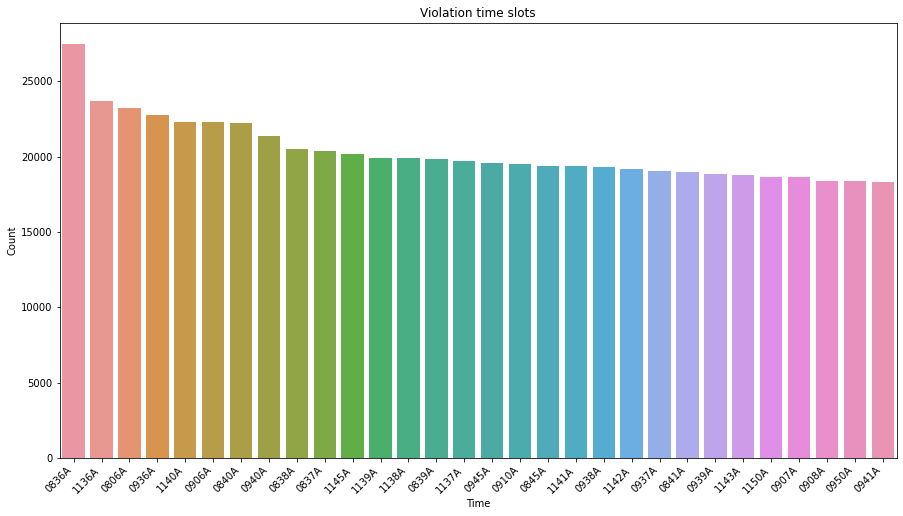

In [14]:
plt.figure(figsize=(15,8))
sns.barplot(x = violationTime.index, y = violationTime.values)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Violation time slots')
plt.xlabel('Time')
plt.ylabel('Count')

##Month wise tickets 

In [16]:
month = []
for timeStamp in pd.to_datetime(dataDF['Issue Date']):
  month.append(timeStamp.month)

monthWise = pd.Series(month).value_counts()
monthWise

10    953458
3     907505
5     898409
4     860217
11    848647
8     838950
9     827402
12    734760
1     722439
6     681133
2     654201
7     173157
dtype: int64

In [20]:
monthWiseNew = monthWise.rename(index= {1:'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5:'May', 6:'June', 7: 'July', 8: 'Aug', 9: 'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})
monthWiseNew

Oct     953458
Mar     907505
May     898409
Apr     860217
Nov     848647
Aug     838950
Sept    827402
Dec     734760
Jan     722439
June    681133
Feb     654201
July    173157
dtype: int64

Text(0, 0.5, 'Count')

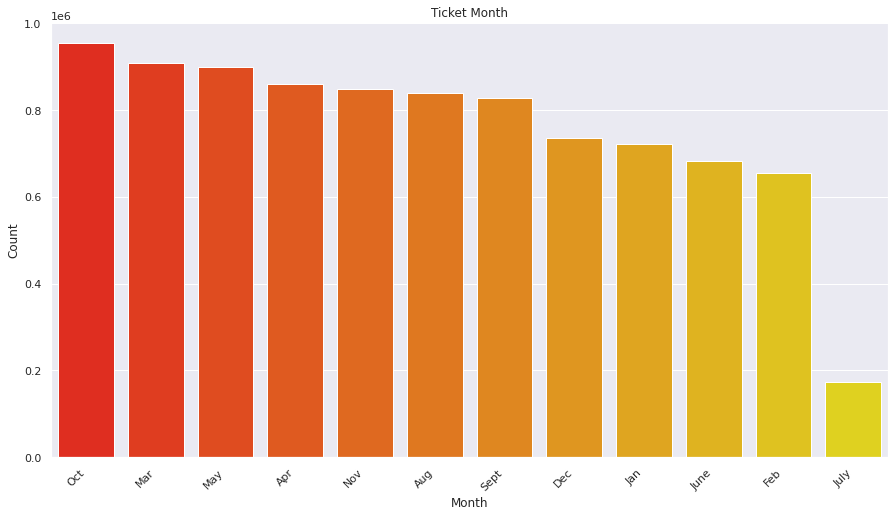

In [28]:
sns.set()
plt.figure(figsize=(15,8))
sns.barplot(x = monthWiseNew.index, y = monthWiseNew.values, palette='autumn')
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Ticket Month')
plt.xlabel('Month')
plt.ylabel('Count')

##Car brand & Vehicle type

In [31]:
carMake = dataDF['Vehicle Make'].value_counts()[:20]
carMake

FORD     1248622
TOYOT     878786
HONDA     810460
CHEVR     743556
NISSA     655276
DODGE     316499
GMC       313671
ME/BE     299845
FRUEH     289634
INTER     277444
BMW       270968
JEEP      213572
HYUND     190631
LEXUS     181642
ACURA     161959
VOLKS     161355
CHRYS     156748
LINCO     147662
MITSU     129208
INFIN     124514
Name: Vehicle Make, dtype: int64

In [33]:
vehicleMakeType = dataDF['Vehicle Body Type'].value_counts()[:20]
vehicleMakeType

SUBN    2797693
4DSD    2513584
VAN     1384393
DELV     730526
SDN      441801
2DSD     255204
PICK     226120
UTIL      78454
REFG      64904
TRAC      62699
TRLR      55643
TAXI      50946
BUS       43382
CONV      41714
MCY       28976
P-U       24036
4 DR      20630
FLAT      12894
WAGO      11936
T/CR      11231
Name: Vehicle Body Type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

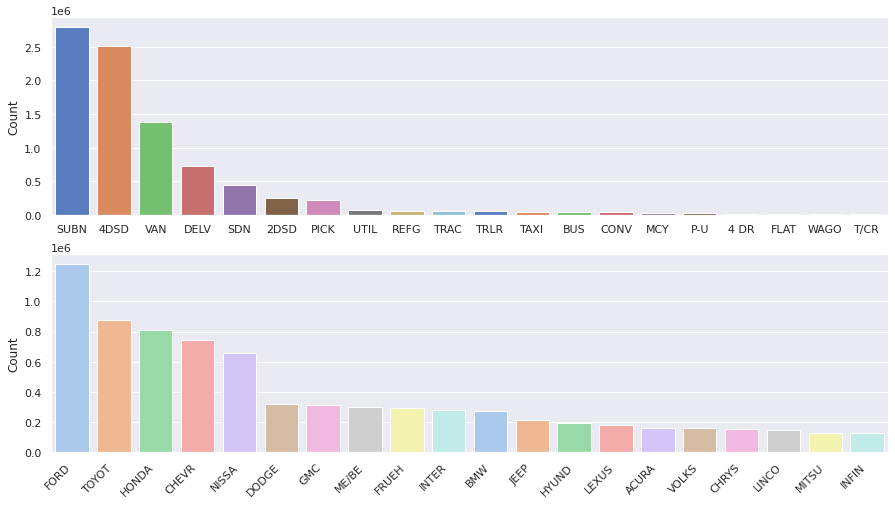

In [51]:
sns.set()

fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(15, 8))
sns.barplot(x = vehicleMakeType.index, y=vehicleMakeType.values, palette='muted',label="Vehicle Type", color="r", ax=ax1)
ax1.set_ylabel('Count')
plt.xticks(rotation=45, horizontalalignment='right')

sns.barplot(x = carMake.index, y = carMake.values, palette='pastel', label="Car Make", color="b", ax=ax2)
ax2.set_ylabel('Count')
plt.xticks(rotation=45, horizontalalignment='right')


##Colorwise

In [56]:
vehicleColor = dataDF['Vehicle Color'].value_counts()[:20]
vehicleColor

WHITE    1349234
GY       1214514
WH       1192996
BK        941231
BLACK     665519
BL        442464
GREY      417286
SILVE     313929
BLUE      301353
RD        272836
BROWN     271122
RED       265215
GR        201825
GREEN     151007
TN        132612
OTHER      91436
BR         71921
TAN        70600
YW         70001
BLK        69288
Name: Vehicle Color, dtype: int64

Text(0, 0.5, 'Count')

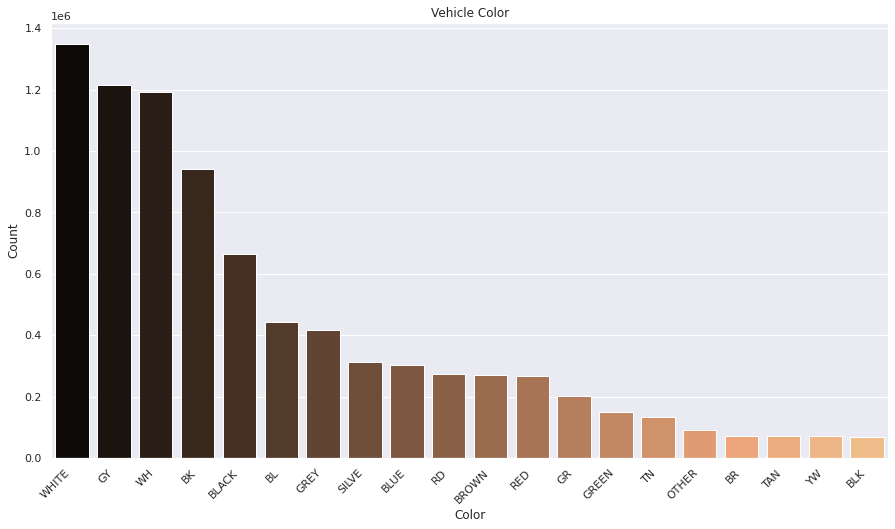

In [66]:
sns.set()
plt.figure(figsize=(15,8))
sns.barplot(x = vehicleColor.index, y = vehicleColor.values, palette='copper')
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Vehicle Color')
plt.xlabel('Color')
plt.ylabel('Count')

##Location wise 

In [72]:
location = dataDF['Street Name'].value_counts()[:20]
location

Broadway                201980
3rd Ave                 148186
5th Ave                  97622
Madison Ave              92179
Lexington Ave            79125
1st Ave                  69512
2nd Ave                  67751
Queens Blvd              60770
7th Ave                  59656
8th Ave                  56147
Amsterdam Ave            55472
6th Ave                  50853
Jamaica Ave              48552
Park Ave                 47675
Columbus Ave             40221
37th Ave                 36225
Coney Island Ave         35776
HORACE HARDING EXPWY     33948
Roosevelt Ave            33250
White Plains Rd          31732
Name: Street Name, dtype: int64

Text(0, 0.5, 'Street Name')

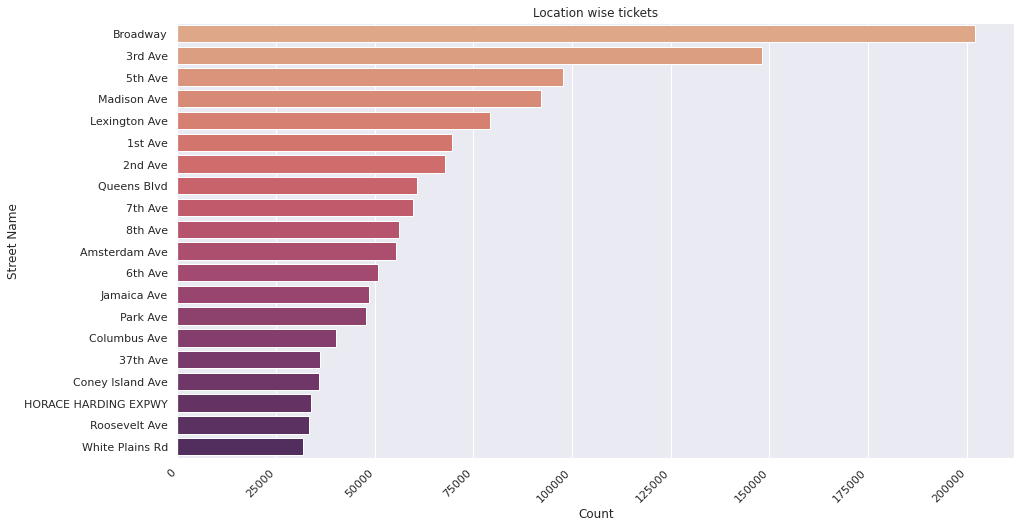

In [76]:
sns.set()
plt.figure(figsize=(15,8))
sns.barplot(x = location.values, y = location.index, palette='flare')
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Location wise tickets')
plt.xlabel('Count')
plt.ylabel('Street Name')